In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [3]:
df = pd.read_csv('dawushiye.csv')
# 数据截取日期:2024/10/16
df.head()

,Unnamed: 0,url,标题,播放量,弹幕数,点赞数,投币数,收藏数,分享数,发布时间
0,0,https://www.bilibili.com/video/BV1rT411x7m8,第N次被现场种草！医生们觉得好用却被雪藏的护肤品_哔哩哔哩_bilibili,2221643,1967,79552,4404,19802,3599,2023-05-19 17:45:00
1,1,https://www.bilibili.com/video/BV1Vb4y1p7Jo,手指割伤被拒诊？头部三甲医院连这都治不了？_哔哩哔哩_bilibili,433015,309,12323,1760,629,339,2022-03-22 20:05:18
2,2,https://www.bilibili.com/video/BV1JA22YHEYt,一封信乐三天！医生和感谢信的故事！看得人心暖暖的！_哔哩哔哩_bilibili,369350,2642,21118,7995,2747,1261,2024-10-11 18:00:00
3,3,https://www.bilibili.com/video/BV1ML411675D,磨牙是肚里有蛔虫？舌苔真的能反映健康吗？牙膏能治幽门螺杆菌？口腔专家在线答疑！_哔哩哔哩_b...,499401,2236,21695,5786,2268,2385,2023-05-17 18:00:00
4,4,https://www.bilibili.com/video/BV1Qw24YJE2D,两年还没入门！这个临床医学怎么越学越慌张！【临床医学生系列】_哔哩哔哩_bilibili,335054,1964,19166,7908,2252,660,2024-10-09 18:00:00


#### 修改时间格式

In [4]:
df = df.drop(df[df['发布时间'] == '未找到发布时间'].index)
df['发布时间'] = pd.to_datetime(df['发布时间'])
df['发布时间'] = df['发布时间'].dt.normalize()

#### 数据清理

In [5]:
df = df.drop(['Unnamed: 0', 'url'],axis=1)

In [6]:
df[df['标题']=='未找到匹配的内容'].sort_values(by="播放量", ascending = False)

,标题,播放量,弹幕数,点赞数,投币数,收藏数,分享数,发布时间
88,未找到匹配的内容,2825416,5427,89774,43651,20268,28133,2021-12-09
302,未找到匹配的内容,2485107,10643,83918,26923,13281,16131,2023-10-27
412,未找到匹配的内容,2095980,9810,68755,34206,10283,7484,2023-06-16
426,未找到匹配的内容,1446825,5995,38470,11034,4622,2234,2022-04-01
290,未找到匹配的内容,1263559,5974,43515,13605,4396,3139,2023-11-08
...,...,...,...,...,...,...,...,...
58,未找到匹配的内容,183814,913,8403,3215,535,83,2023-03-22
277,未找到匹配的内容,16803,87,335,155,26,29,2018-09-03
250,未找到匹配的内容,16597,87,410,168,37,6,2019-08-09
324,未找到匹配的内容,10783,36,171,80,25,23,2018-05-24


In [8]:
df.loc[88,'标题'] = '【Reaction】北大医学博士们看offer3是什么反应？'

In [9]:
df.nlargest(n=5,columns='播放量')

,标题,播放量,弹幕数,点赞数,投币数,收藏数,分享数,发布时间
181,王者荣耀真人硬核模仿合辑（六）_哔哩哔哩_bilibili,5546602,11458,337597,96864,50283,51503,2020-04-24
241,王者荣耀真人硬核模仿合辑（一）_哔哩哔哩_bilibili,4403653,8173,272810,134256,83579,100425,2019-09-23
120,王者荣耀真人硬核模仿合辑（八）_哔哩哔哩_bilibili,3594406,1455,99091,8757,7899,5473,2021-06-02
36,医生出120遇到的都是什么狗血剧情？打120怎么沟通更有效？【医生聊天室】_哔哩哔哩_bil...,3110294,8947,107208,28333,10737,4962,2023-04-12
88,【Reaction】北大医学博士们看offer3是什么反应？,2825416,5427,89774,43651,20268,28133,2021-12-09


In [10]:
df.nlargest(n=5,columns='弹幕数')

,标题,播放量,弹幕数,点赞数,投币数,收藏数,分享数,发布时间
335,华语TOP100！挑战猜歌名！每一首都是青春！_哔哩哔哩_bilibili,1272851,19483,38583,11863,5938,3627,2023-09-20
332,华语TOP50猜歌名！有人急红了脸，有人唱湿了眼…_哔哩哔哩_bilibili,1181940,17174,43925,24845,6811,3137,2023-09-22
207,【年终大抽奖】医生也送智商税？录制现场秒变许愿屋？都进来接好运吧！_哔哩哔哩_bilibili,827790,14763,45570,29424,6928,2197,2024-02-07
386,衣服时尚了，人丑了！医学博士赶潮流的n种翻车方式_哔哩哔哩_bilibili,649017,12570,32748,11093,2387,1338,2023-07-19
24,保健品有用吗？女性求职难？医生狠起来连自己人都吐槽！_哔哩哔哩_bilibili,720137,11494,32975,16533,3709,1013,2022-02-18


In [11]:
df.nlargest(n=5,columns='点赞数')

,标题,播放量,弹幕数,点赞数,投币数,收藏数,分享数,发布时间
181,王者荣耀真人硬核模仿合辑（六）_哔哩哔哩_bilibili,5546602,11458,337597,96864,50283,51503,2020-04-24
241,王者荣耀真人硬核模仿合辑（一）_哔哩哔哩_bilibili,4403653,8173,272810,134256,83579,100425,2019-09-23
227,王者荣耀真人硬核模仿合辑（三）_哔哩哔哩_bilibili,2695947,6010,192187,94664,33164,27236,2019-12-13
117,工科男模仿美少女战士变身，比官方真人版更还原！_哔哩哔哩_bilibili,2493924,9925,150182,89867,36657,84277,2021-06-10
235,王者荣耀真人硬核模仿合辑（二）_哔哩哔哩_bilibili,2329673,5728,147290,70718,24594,22405,2019-10-26


In [12]:
df.nlargest(n=5,columns='投币数')

,标题,播放量,弹幕数,点赞数,投币数,收藏数,分享数,发布时间
241,王者荣耀真人硬核模仿合辑（一）_哔哩哔哩_bilibili,4403653,8173,272810,134256,83579,100425,2019-09-23
181,王者荣耀真人硬核模仿合辑（六）_哔哩哔哩_bilibili,5546602,11458,337597,96864,50283,51503,2020-04-24
227,王者荣耀真人硬核模仿合辑（三）_哔哩哔哩_bilibili,2695947,6010,192187,94664,33164,27236,2019-12-13
117,工科男模仿美少女战士变身，比官方真人版更还原！_哔哩哔哩_bilibili,2493924,9925,150182,89867,36657,84277,2021-06-10
235,王者荣耀真人硬核模仿合辑（二）_哔哩哔哩_bilibili,2329673,5728,147290,70718,24594,22405,2019-10-26


In [13]:
df.nlargest(n=5,columns='分享数')

,标题,播放量,弹幕数,点赞数,投币数,收藏数,分享数,发布时间
241,王者荣耀真人硬核模仿合辑（一）_哔哩哔哩_bilibili,4403653,8173,272810,134256,83579,100425,2019-09-23
117,工科男模仿美少女战士变身，比官方真人版更还原！_哔哩哔哩_bilibili,2493924,9925,150182,89867,36657,84277,2021-06-10
181,王者荣耀真人硬核模仿合辑（六）_哔哩哔哩_bilibili,5546602,11458,337597,96864,50283,51503,2020-04-24
124,鼻炎/咽炎/喉炎丨耳鼻喉科三大“绝症”怎么治？_哔哩哔哩_bilibili,1196276,5166,49322,21901,31871,28977,2024-05-22
88,【Reaction】北大医学博士们看offer3是什么反应？,2825416,5427,89774,43651,20268,28133,2021-12-09


In [14]:
df.nlargest(n=5,columns='收藏数')

,标题,播放量,弹幕数,点赞数,投币数,收藏数,分享数,发布时间
241,王者荣耀真人硬核模仿合辑（一）_哔哩哔哩_bilibili,4403653,8173,272810,134256,83579,100425,2019-09-23
203,35位医生投票：家中常备什么药？竟然有一个德不配位！_哔哩哔哩_bilibili,1555980,8883,73445,39084,52700,26417,2024-02-23
181,王者荣耀真人硬核模仿合辑（六）_哔哩哔哩_bilibili,5546602,11458,337597,96864,50283,51503,2020-04-24
132,传统工科出路在哪？一个视频讲透机械类所有专业/行业！【框框的b站大学-机械类】机械工程、机械...,1493099,3643,49242,17425,47730,18611,2023-01-07
117,工科男模仿美少女战士变身，比官方真人版更还原！_哔哩哔哩_bilibili,2493924,9925,150182,89867,36657,84277,2021-06-10


In [15]:
df.nlargest(n=5,columns='分享数')

,标题,播放量,弹幕数,点赞数,投币数,收藏数,分享数,发布时间
241,王者荣耀真人硬核模仿合辑（一）_哔哩哔哩_bilibili,4403653,8173,272810,134256,83579,100425,2019-09-23
117,工科男模仿美少女战士变身，比官方真人版更还原！_哔哩哔哩_bilibili,2493924,9925,150182,89867,36657,84277,2021-06-10
181,王者荣耀真人硬核模仿合辑（六）_哔哩哔哩_bilibili,5546602,11458,337597,96864,50283,51503,2020-04-24
124,鼻炎/咽炎/喉炎丨耳鼻喉科三大“绝症”怎么治？_哔哩哔哩_bilibili,1196276,5166,49322,21901,31871,28977,2024-05-22
88,【Reaction】北大医学博士们看offer3是什么反应？,2825416,5427,89774,43651,20268,28133,2021-12-09


#### 计算相关性系数

> 播放量-点赞数 0.93，收藏数-分享数 0.91，投币数-点赞数 0.91

In [16]:
df.corr(method = 'spearman') 

,播放量,弹幕数,点赞数,投币数,收藏数,分享数
播放量,1.000000,0.794055,0.931736,0.814175,0.872742,0.809490
弹幕数,0.794055,1.000000,0.801226,0.823379,0.717425,0.629756
点赞数,0.931736,0.801226,1.000000,0.915505,0.894335,0.819778
投币数,0.814175,0.823379,0.915505,1.000000,0.831374,0.720418
收藏数,0.872742,0.717425,0.894335,0.831374,1.000000,0.914508
分享数,0.809490,0.629756,0.819778,0.720418,0.914508,1.000000


In [20]:
from pyecharts.charts import Line #折线图所导入的包
from pyecharts import options as opts #全局设置所导入的包
import matplotlib.pyplot as plt

In [18]:
df['发布时间'].dt.strftime('%Y-%m-%d')
df = df.sort_values('发布时间',ascending = True)

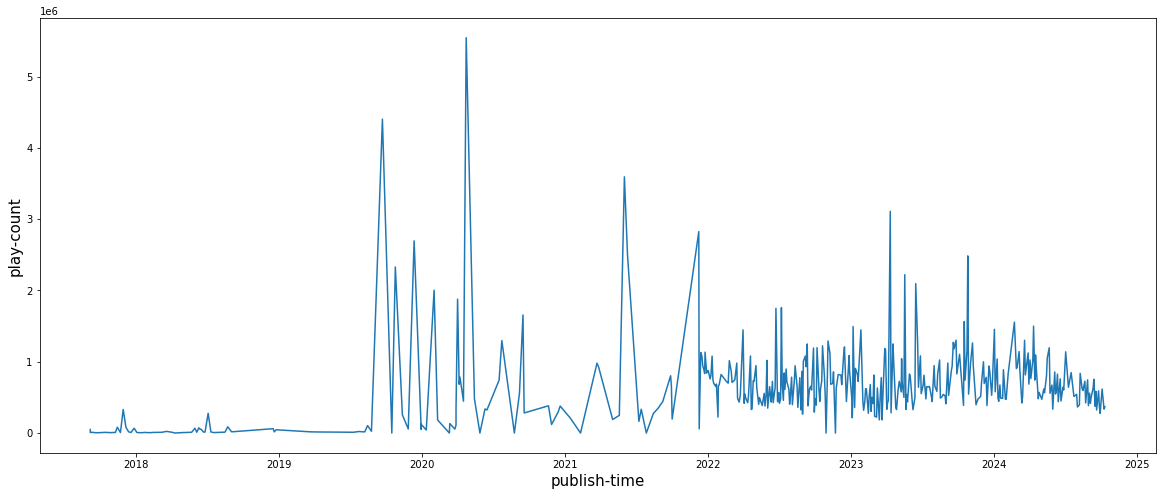

In [21]:
plt.figure(figsize=(20,8))
plt.xlabel('publish-time',fontsize=15)
plt.ylabel('play-count',fontsize=15)
plt.plot(df['发布时间'], df['播放量'])
plt.show()

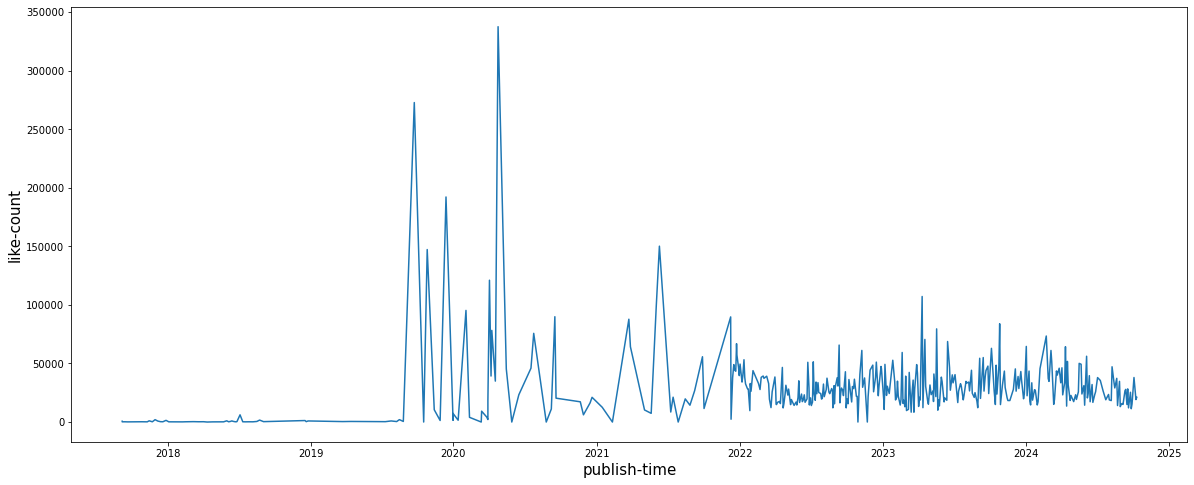

In [22]:
plt.figure(figsize=(20,8))
plt.xlabel('publish-time',fontsize=15)
plt.ylabel('like-count',fontsize=15)
plt.plot(df['发布时间'], df['点赞数'])
plt.show()

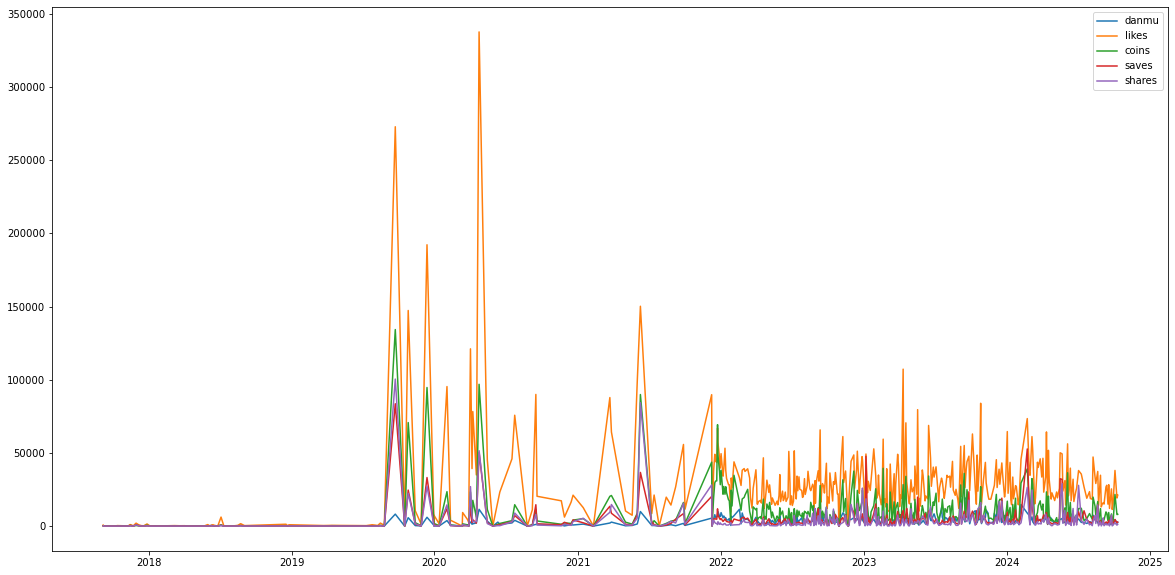

In [24]:
plt.figure(figsize=(20,10))
#plt.plot(df['发布时间'], df['播放量'], label='plays') 
plt.plot(df['发布时间'], df['弹幕数'], label='danmu') 
plt.plot(df['发布时间'], df['点赞数'], label='likes')  
plt.plot(df['发布时间'], df['投币数'], label='coins')  
plt.plot(df['发布时间'], df['收藏数'], label='saves')  
plt.plot(df['发布时间'], df['分享数'], label='shares') 

plt.legend()

>使用Pandas的groupby方法按照年份进行分组;
使用size方法来获取每个组的视频数量;
使用unstack方法来转换数据，使得年份成为索引和列;
>最后，使用reset_index方法来将年份从行索引转换为列

In [25]:
video_yearly = df.groupby(df['发布时间'].dt.year).size()
video_yearly_df = video_yearly.reset_index(name='video count')
video_yearly_df.columns = ['year', 'video count']


In [26]:
import seaborn as sns

<AxesSubplot:xlabel='year', ylabel='video count'>

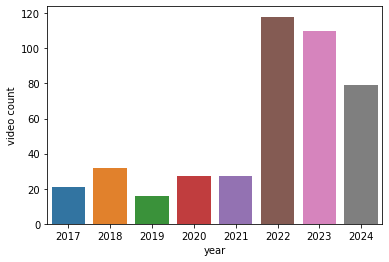

In [27]:
sns.barplot(x=video_yearly_df['year'], y=video_yearly_df['video count'])
